In [1]:
import requests
from bs4 import BeautifulSoup

# get the HTML content of the page
url = 'https://catalog.kent.edu/coursesaz/'
response = requests.get(url)
html_content = response.text

In [2]:
Base_url = 'https://catalog.kent.edu'

In [3]:
# parse the HTML content using BeautifulSoup
soup = BeautifulSoup(html_content, 'html.parser')

In [4]:
# find the section that contains the course information
A2z = soup.find('div', {'id': 'atozindex'})

In [ ]:
A2z

In [ ]:
links = A2z.find_all('a')
links

In [ ]:
# remove non herf links from the list
links = [link for link in links if link.has_attr('href')]
links

In [ ]:
# get href links from the list and add base url to it
links = [Base_url + link['href'] for link in links]
links

In [9]:
Course = []

## Test purpose:

In [ ]:
link0 = links[0]
link0

In [11]:
# get the HTML content of the page
response = requests.get(link0)
html_content = response.text

In [12]:
# parse the HTML content using BeautifulSoup
soup = BeautifulSoup(html_content, 'html.parser')

In [13]:
# sc_sccoursedescs class contains the course information
course_info = soup.find_all('div', {'class': 'sc_sccoursedescs'})

In [ ]:
course_info

In [30]:
# then courseblock class contains the course information
course_info = soup.find_all('div', {'class': 'courseblock'})
course_info

[<div class="courseblock">
 <p class="courseblocktitle noindent"><strong>ACCT 23020      INTRODUCTION TO FINANCIAL ACCOUNTING        3 Credit Hours</strong></p>
 <p class="courseblockdesc noindent">
 (Equivalent to <a class="bubblelink code" href="/search/?P=ACTT%2011000" onclick="return showCourse(this, 'ACTT 11000');" title="ACTT 11000">ACTT 11000</a>) Introduction to the basic concepts and standards underlying financial accounting. Topics to be covered include revenue recognition, receivables, inventory, long-lived assets, liabilities and stockholders' equity. The impact of transactions on the accounting equation and financial statements (balance sheet, income statement and cash flows) is emphasized. <p class="courseblockdesc noindent"><strong>Prerequisite: </strong> None.</p><p class="courseblockdesc noindent"><strong>Schedule Type: </strong>Lecture</p><p class="courseblockdesc noindent"><strong>Contact Hours: </strong>3 lecture</p><p class="courseblockdesc noindent"><strong>Grade 

In [31]:
# append the course information to the list
for course in course_info:
    Course.append(course.text)

In [32]:
Course

["\nACCT\xa023020\xa0\xa0\xa0\xa0  INTRODUCTION TO FINANCIAL ACCOUNTING   \xa0\xa0\xa0\xa0 3 Credit Hours\n\n(Equivalent to ACTT\xa011000) Introduction to the basic concepts and standards underlying financial accounting. Topics to be covered include revenue recognition, receivables, inventory, long-lived assets, liabilities and stockholders' equity. The impact of transactions on the accounting equation and financial statements (balance sheet, income statement and cash flows) is emphasized. Prerequisite:  None.Schedule Type: LectureContact Hours: 3 lectureGrade Mode: Standard LetterAttributes: TAG Business\n",
 '\nACCT\xa023021\xa0\xa0\xa0\xa0  INTRODUCTION TO MANAGERIAL ACCOUNTING   \xa0\xa0\xa0\xa0 3 Credit Hours\n\n(Equivalent to ACTT\xa011001) Introduction to managerial accounting concepts and tools that can be used to support decision-making in organizations. Includes coverage of cost systems, cost behavior, cost-volume-profit analysis, relevant costs and budgets. Prerequisite:  AC

In [43]:
def split_course_info(text):
    '''
    This function splits the course info into course number, course title, and course description.
    '''
    # split the text by new line
    text = text.split('\n')
    # remove \xa0 from the list
    text = [t.replace('\xa0', '') for t in text]
    # title is the second element of the list
    title = text[1]
    # description is the last element of the list
    description = text[-2]
    
    # split the title by space
    title = title.split(' ')
    code = title[0]
    craditHour = title[-3]
    title = ' '.join(title[1:-3])
    return code, craditHour, title, description
        

In [44]:
Course_info = []
for course in Course:
    dic = {}
    code, craditHour, title, description = split_course_info(course)
    dic['code'] = code
    dic['craditHour'] = craditHour
    dic['title'] = title
    dic['description'] = description
    Course_info.append(dic)

In [45]:
Course_info

[{'code': 'ACCT23020',
  'craditHour': '3',
  'title': ' INTRODUCTION TO FINANCIAL ACCOUNTING   ',
  'description': "(Equivalent to ACTT11000) Introduction to the basic concepts and standards underlying financial accounting. Topics to be covered include revenue recognition, receivables, inventory, long-lived assets, liabilities and stockholders' equity. The impact of transactions on the accounting equation and financial statements (balance sheet, income statement and cash flows) is emphasized. Prerequisite:  None.Schedule Type: LectureContact Hours: 3 lectureGrade Mode: Standard LetterAttributes: TAG Business"},
 {'code': 'ACCT23021',
  'craditHour': '3',
  'title': ' INTRODUCTION TO MANAGERIAL ACCOUNTING   ',
  'description': '(Equivalent to ACTT11001) Introduction to managerial accounting concepts and tools that can be used to support decision-making in organizations. Includes coverage of cost systems, cost behavior, cost-volume-profit analysis, relevant costs and budgets. Prerequisi

In [47]:
# make this as a json file 
import json
with open('course_info.json', 'w') as f:
    json.dump(Course_info, f)

## With mongoDb database

In [1]:
import pymongo
from pymongo import MongoClient
 
# connect to the MongoDB server
client = MongoClient('localhost', 27017)
 
# create a database
db = client['course_info']
 
# create a collection
collection = db['course_info']

## All Couserses

In [ ]:
limit = 100
for link in links:
    # get the HTML content of the page
    response = requests.get(link)
    html_content = response.text

    # parse the HTML content using BeautifulSoup
    soup = BeautifulSoup(html_content, 'html.parser')

    # sc_sccoursedescs class contains the course information
    course_info = soup.find_all('div', {'class': 'sc_sccoursedescs'})

    # then courseblock class contains the course information
    course_info = soup.find_all('div', {'class': 'courseblock'})
    
    Course = []
    # append the course information to the list
    for course in course_info:
        Course.append(course.text)
    
    Course_info = []
    for course in Course:
        dic = {}
        code, craditHour, title, description = split_course_info(course)
        print("Persisting course: ", title)
        dic['code'] = code
        dic['craditHour'] = craditHour
        dic['title'] = title
        dic['description'] = description
        Course_info.append(dic)
        limit -= 1
        if limit == 0:
            # exit the loop
            exit()
    
    collection.insert_many(Course_info)

## Get all courses with a specific name

In [4]:
# get the course information from the database
user_input = input('Enter the course code: ')
 
# find the course information
course = collection.find_one({'code': user_input})

import pprint
pprint.pprint(course)

{'_id': ObjectId('640ae7bdb014eb85fa14cb36'),
 'code': 'ACCT23020',
 'craditHour': '3',
 'description': '(Equivalent to ACTT11000) Introduction to the basic concepts '
                'and standards underlying financial accounting. Topics to be '
                'covered include revenue recognition, receivables, inventory, '
                "long-lived assets, liabilities and stockholders' equity. The "
                'impact of transactions on the accounting equation and '
                'financial statements (balance sheet, income statement and '
                'cash flows) is emphasized. Prerequisite:  None.Schedule Type: '
                'LectureContact Hours: 3 lectureGrade Mode: Standard '
                'LetterAttributes: TAG Business',
 'title': ' INTRODUCTION TO FINANCIAL ACCOUNTING   '}


## Visualize the courses crawled

In [5]:
all_courses = collection.find()

import pprint
for course in all_courses:
    pprint.pprint(course)
    
# make a pipeline to get the course information
pipeline = [
    {
        '$group': {
            '_id': '$code',
            'count': {'$sum': 1}
        }
    },
    {
        '$sort': {'count': -1}
    }
]

# get the course information
course_info = collection.aggregate(pipeline)

for course in course_info:
    print(course['_id'], course['count'])

{'_id': ObjectId('640ae7bdb014eb85fa14cb36'),
 'code': 'ACCT23020',
 'craditHour': '3',
 'description': '(Equivalent to ACTT11000) Introduction to the basic concepts '
                'and standards underlying financial accounting. Topics to be '
                'covered include revenue recognition, receivables, inventory, '
                "long-lived assets, liabilities and stockholders' equity. The "
                'impact of transactions on the accounting equation and '
                'financial statements (balance sheet, income statement and '
                'cash flows) is emphasized. Prerequisite:  None.Schedule Type: '
                'LectureContact Hours: 3 lectureGrade Mode: Standard '
                'LetterAttributes: TAG Business',
 'title': ' INTRODUCTION TO FINANCIAL ACCOUNTING   '}
{'_id': ObjectId('640ae7bdb014eb85fa14cb37'),
 'code': 'ACCT23021',
 'craditHour': '3',
 'description': '(Equivalent to ACTT11001) Introduction to managerial '
                'accounting

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# get the course information
course_info = collection.find()

# make a dataframe
df = pd.DataFrame(course_info)

# drop the _id column
df.drop('_id', axis=1, inplace=True)

# show the first 5 rows
df.head()

,code,craditHour,title,description
0,ACCT23020,3,INTRODUCTION TO FINANCIAL ACCOUNTING,(Equivalent to ACTT11000) Introduction to the ...
1,ACCT23021,3,INTRODUCTION TO MANAGERIAL ACCOUNTING,(Equivalent to ACTT11001) Introduction to mana...
2,ACCT33001,3,INTERMEDIATE FINANCIAL ACCOUNTING I,Review of the accounting cycle; financial stat...
3,ACCT33004,3,INTRODUCTION TO ACCOUNTING SYSTEMS,Overview of accounting information systems wit...
4,ACCT33010,3,COST ACCOUNTING,Cost accounting for manufacturing and service ...


## Plot the courses craditHours

In [11]:
# craditHour column contains the credit hour information
df['craditHour'].value_counts()

3       910
1-3     132
1       121
2       112
4        73
1-6      21
5        19
1-5      16
1-4      16
1-9      15
2-6      11
1-15     10
3-6       9
15        6
9         6
6         5
1-12      4
2-4       4
2-3       4
2,3       3
1-8       2
1-10      2
2-9       2
2-15      1
6-9       1
2-10      1
1-2       1
3-12      1
3,6       1
1,2       1
Name: craditHour, dtype: int64

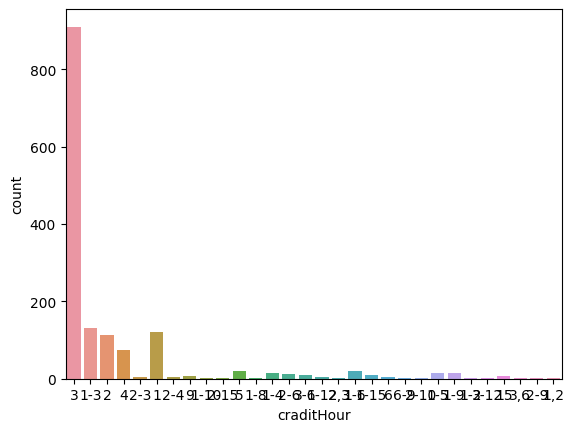

In [12]:
# plot the credit hour information
sns.countplot(x='craditHour', data=df)
plt.show()

In [13]:
# description column contains the course description
df['description'].value_counts()

Prerequisite:  Graduate standing.Schedule Type: LectureContact Hours: 3 lectureGrade Mode: Standard Letter                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 11
An instructional program that prepares an individual to undertake the broad range of technical tasks associated with military leadership and defense management. This course is optional for university academic credit; however, it is mandatory for Air Force ROTC credit for scholarship or commissioning purposes. Prerequisite:  None.Schedule Type: LaboratoryContact Hours: 1 labGrade Mode: Satisfactory/Unsatisfactory           

In [14]:
# how many different courses are there
df['title'].nunique() # current in database

1114

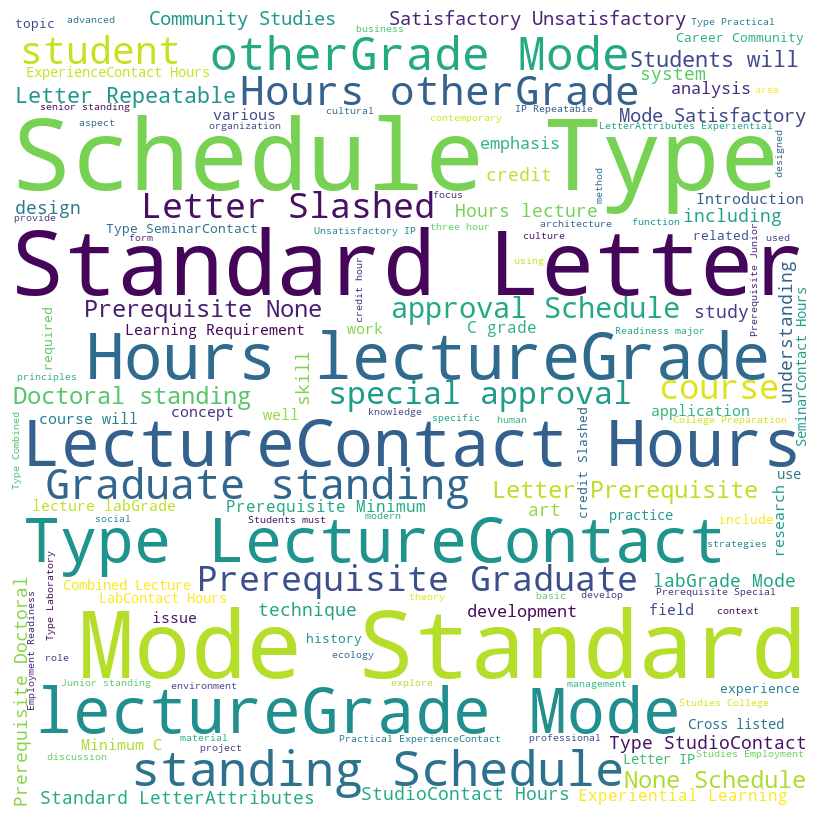

In [15]:
# what is common term in the course description
from wordcloud import WordCloud, STOPWORDS
 
# join all the course description
text = ' '.join(df['description'])

# make a word cloud
wordcloud = WordCloud(width=800, height=800,
                background_color='white',
                stopwords=STOPWORDS,
                min_font_size=10).generate(text)
 
# plot the WordCloud image
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

In [16]:
# keep the course information that has 3 credit hour
df = df[df['craditHour'] == '3']

# show the first 5 rows
df.head()

,code,craditHour,title,description
0,ACCT23020,3,INTRODUCTION TO FINANCIAL ACCOUNTING,(Equivalent to ACTT11000) Introduction to the ...
1,ACCT23021,3,INTRODUCTION TO MANAGERIAL ACCOUNTING,(Equivalent to ACTT11001) Introduction to mana...
2,ACCT33001,3,INTERMEDIATE FINANCIAL ACCOUNTING I,Review of the accounting cycle; financial stat...
3,ACCT33004,3,INTRODUCTION TO ACCOUNTING SYSTEMS,Overview of accounting information systems wit...
4,ACCT33010,3,COST ACCOUNTING,Cost accounting for manufacturing and service ...


In [2]:
# Create dummy student data
import random
import string
 
# create a list of student names
student_names = [''.join(random.choices(string.ascii_uppercase, k=5)) for i in range(100)]
 
# create a list of student ids
student_ids = [i for i in range(100)]
 
# student data class
class Student:
    def __init__(self, name, id):
        self.name = name
        self.id = id
        self.courses = []
         
    def add_course(self, course):
        self.courses.append(course)
         
    def __str__(self):
        return f'{self.name} {self.id} {self.courses}'
     
# create a list of student objects
students = [Student(name, id) for name, id in zip(student_names, student_ids)]

In [8]:
# add courses to the students
for student in students:
    for i in range(3):
        course = df.sample(1).to_dict('records')[0]
        student.add_course(course)
        
# show the first 5 students
for i in range(5):
    print(students[i])

UAHUW 0 [{'code': 'ARCH60602', 'craditHour': '3', 'title': ' TOOLS OF FABRICATION   ', 'description': 'Course covers advanced three-dimensional modeling tools and the different methods for  outputting digital models into the physical environment. Includes three-dimension printing, laser cutting, CNC milling and vacuum forming. Prerequisite:  Graduate standing.Schedule Type: Combined Lecture and LabContact Hours: 3 otherGrade Mode: Standard Letter'}, {'code': 'AERN45340', 'craditHour': '3', 'title': ' AIRCRAFT MAINTENANCE   ', 'description': 'Prerequisite:  Aeronautics major; and Senior standing; and special approval.Schedule Type: Combined Lecture and LabContact Hours: 3 otherGrade Mode: Standard Letter'}, {'code': 'ARCH45620', 'craditHour': '1-3', 'title': ' INTRODUCTION TO PRESERVATION   ', 'description': '(Repeatable for maximum 3 credit hours)(Slashed with ARCH55620) An overview of preservation, including building analysis, conservation, adaptive reuse, economic benefits of preserv

In [9]:
# view the student data
students[0].__dict__

{'name': 'UAHUW',
 'id': 0,
 'courses': [{'code': 'ARCH60602',
   'craditHour': '3',
   'title': ' TOOLS OF FABRICATION   ',
   'description': 'Course covers advanced three-dimensional modeling tools and the different methods for  outputting digital models into the physical environment. Includes three-dimension printing, laser cutting, CNC milling and vacuum forming. Prerequisite:  Graduate standing.Schedule Type: Combined Lecture and LabContact Hours: 3 otherGrade Mode: Standard Letter'},
  {'code': 'AERN45340',
   'craditHour': '3',
   'title': ' AIRCRAFT MAINTENANCE   ',
   'description': 'Prerequisite:  Aeronautics major; and Senior standing; and special approval.Schedule Type: Combined Lecture and LabContact Hours: 3 otherGrade Mode: Standard Letter'},
  {'code': 'ARCH45620',
   'craditHour': '1-3',
   'title': ' INTRODUCTION TO PRESERVATION   ',
   'description': '(Repeatable for maximum 3 credit hours)(Slashed with ARCH55620) An overview of preservation, including building analy

In [10]:
# register the student data to the database
collection = db['student']
collection.insert_many([student.__dict__ for student in students])

In [11]:
# get the student data from the database
student = collection.find_one({'id': 0})

In [12]:
student

{'_id': ObjectId('6414731b31a95ce75fcea7d5'),
 'name': 'UAHUW',
 'id': 0,
 'courses': [{'code': 'ARCH60602',
   'craditHour': '3',
   'title': ' TOOLS OF FABRICATION   ',
   'description': 'Course covers advanced three-dimensional modeling tools and the different methods for  outputting digital models into the physical environment. Includes three-dimension printing, laser cutting, CNC milling and vacuum forming. Prerequisite:  Graduate standing.Schedule Type: Combined Lecture and LabContact Hours: 3 otherGrade Mode: Standard Letter'},
  {'code': 'AERN45340',
   'craditHour': '3',
   'title': ' AIRCRAFT MAINTENANCE   ',
   'description': 'Prerequisite:  Aeronautics major; and Senior standing; and special approval.Schedule Type: Combined Lecture and LabContact Hours: 3 otherGrade Mode: Standard Letter'},
  {'code': 'ARCH45620',
   'craditHour': '1-3',
   'title': ' INTRODUCTION TO PRESERVATION   ',
   'description': '(Repeatable for maximum 3 credit hours)(Slashed with ARCH55620) An over